<b>CLASSIFICATION</b> - Online Shoppers Purchasing Intention

Team Number : 20

Sai Sravya Bhupathiraju, Lakshmi Mounika Kalidindi
 

                                DATA DESCRIPTION

We have chosen online shoppers purchasing intention dataset. The data describes how a particular online website activity impacts the revenue

Yes - Real impact by buying the product

No - A product is not purchased
 
Dataset Link  - https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Dataset Information 

Features : 18 

Instances : 12330

Categorical/ Ordinal columns : 4

Missing data : No 

Administrative, Administrative Duration, Informational, Informational Duration, Product Related, Product-Related Duration: Number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

Bounce Rate: The percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

Exit Rate: Feature for a specific web page is calculated as for all pageview to the page, the percentage that was the last in the session.

Page Value: The average value for a web page that a user visited before completing an e-commerce transaction.

Special Day: Closeness of the site visiting time to a specific special day in which the sessions are more likely to be finalized with the transaction.

Operating System, Browser, Region, Traffic type, Visitor type


<b>DATA IMPORT </b>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('online_shoppers_intention.csv')
print(df)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

The dataset does not contain any missing data, so we have replaced some of the data with missing values : ( 5 - 10% of the data)

In [2]:
dfX = df.drop(['Revenue','Weekend','Administrative','Informational','Region','VisitorType','BounceRates','OperatingSystems','PageValues','SpecialDay','Administrative_Duration','Administrative_Duration','ExitRates','VisitorType','ProductRelated_Duration'],axis = 1)
for col in dfX.columns:
    df.loc[df.sample(frac=0.015).index, col] = np.nan

In [3]:
(df.isnull().sum().sum()/(len(df)))*100

7.502027575020276

7.5% of the data contains nan values ( Missing values )

<b>DATA CLEANING</b>

Replace the missing values of the columns : Month, Browser, Traffic Type, Informational_Duration, Product_Related

In [4]:
df.Month  = df.Month.replace({np.nan : 'May'})
df.Browser  = df.Browser.replace({np.nan : 2.0 })
df.TrafficType  = df.TrafficType.replace({np.nan : 2.0 })
df.Informational_Duration = df.Informational_Duration.replace({np.nan : 0.000000  })
df.ProductRelated  = df.ProductRelated.replace({np.nan : 1.0  })

The column month has no much significance so we can drop it 

In [5]:
df = df.drop('Month', axis = 1)

<b>DATA TRANSFORMATION</b>


Replace the Visitor Type column by mapping the types of customers to numbers.
Replace the True and False binary values with high frequency values in that column

In [6]:
df['VisitorType'] = df['VisitorType'].map({'Returning_Visitor':2, 'New_Visitor':1,'Other' : 0 }).astype(int)
df.Revenue = df.Revenue.replace({False: 1,True : 0})
df.Weekend = df.Weekend.replace({False: 1, True: 0})

We find that the Data is highly imbalanced with 10422 values of 1 -> Which represents False for the revenue

In [7]:
df.Revenue.value_counts()

1    10422
0     1908
Name: Revenue, dtype: int64

<b>VISUALIZATION</b> 

DISTRIBUTION OF ALL THE FEATURES

In [8]:
y = df['Revenue']
X = df.drop('Revenue', axis = 1)

array([[<AxesSubplot:xlabel='Administrative', ylabel='Administrative'>,
        <AxesSubplot:xlabel='Administrative_Duration', ylabel='Administrative'>,
        <AxesSubplot:xlabel='Informational', ylabel='Administrative'>,
        <AxesSubplot:xlabel='Informational_Duration', ylabel='Administrative'>,
        <AxesSubplot:xlabel='ProductRelated', ylabel='Administrative'>,
        <AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Administrative'>,
        <AxesSubplot:xlabel='BounceRates', ylabel='Administrative'>,
        <AxesSubplot:xlabel='ExitRates', ylabel='Administrative'>,
        <AxesSubplot:xlabel='PageValues', ylabel='Administrative'>,
        <AxesSubplot:xlabel='SpecialDay', ylabel='Administrative'>,
        <AxesSubplot:xlabel='OperatingSystems', ylabel='Administrative'>,
        <AxesSubplot:xlabel='Browser', ylabel='Administrative'>,
        <AxesSubplot:xlabel='Region', ylabel='Administrative'>,
        <AxesSubplot:xlabel='TrafficType', ylabel='Administrative'>,

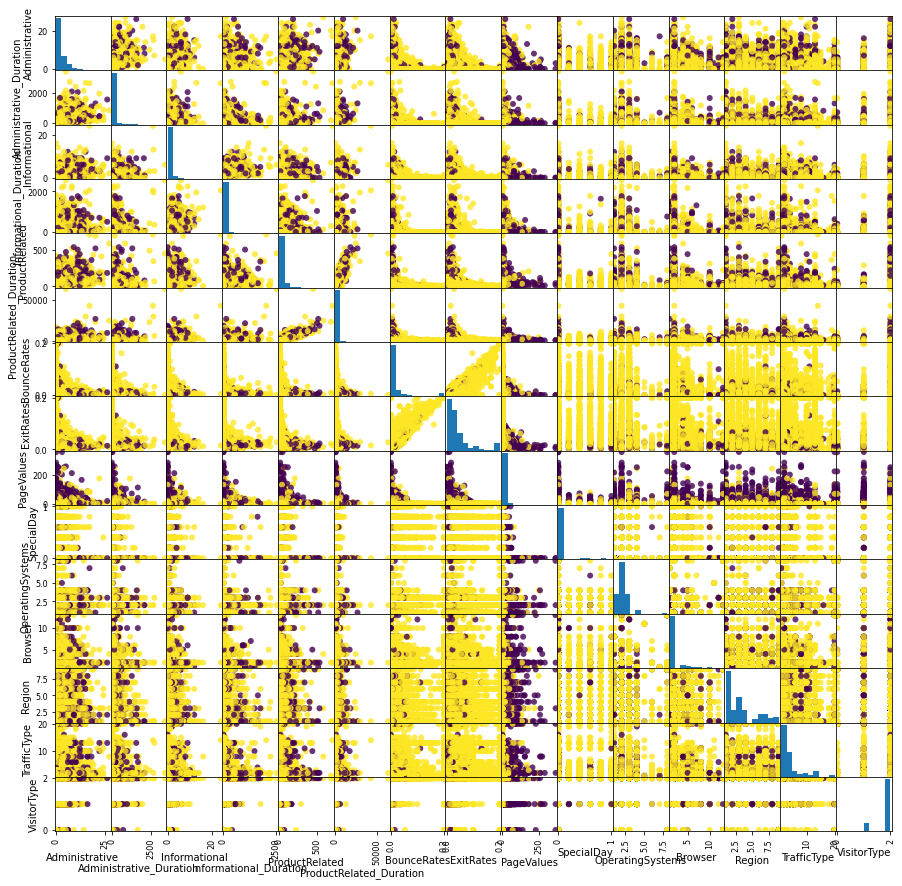

In [9]:
import pandas as pd
from pandas.plotting import scatter_matrix
attributes = df.columns[:15]
scatter_matrix(df[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

CORRELATION OF ALL THE FEATURES

<AxesSubplot:>

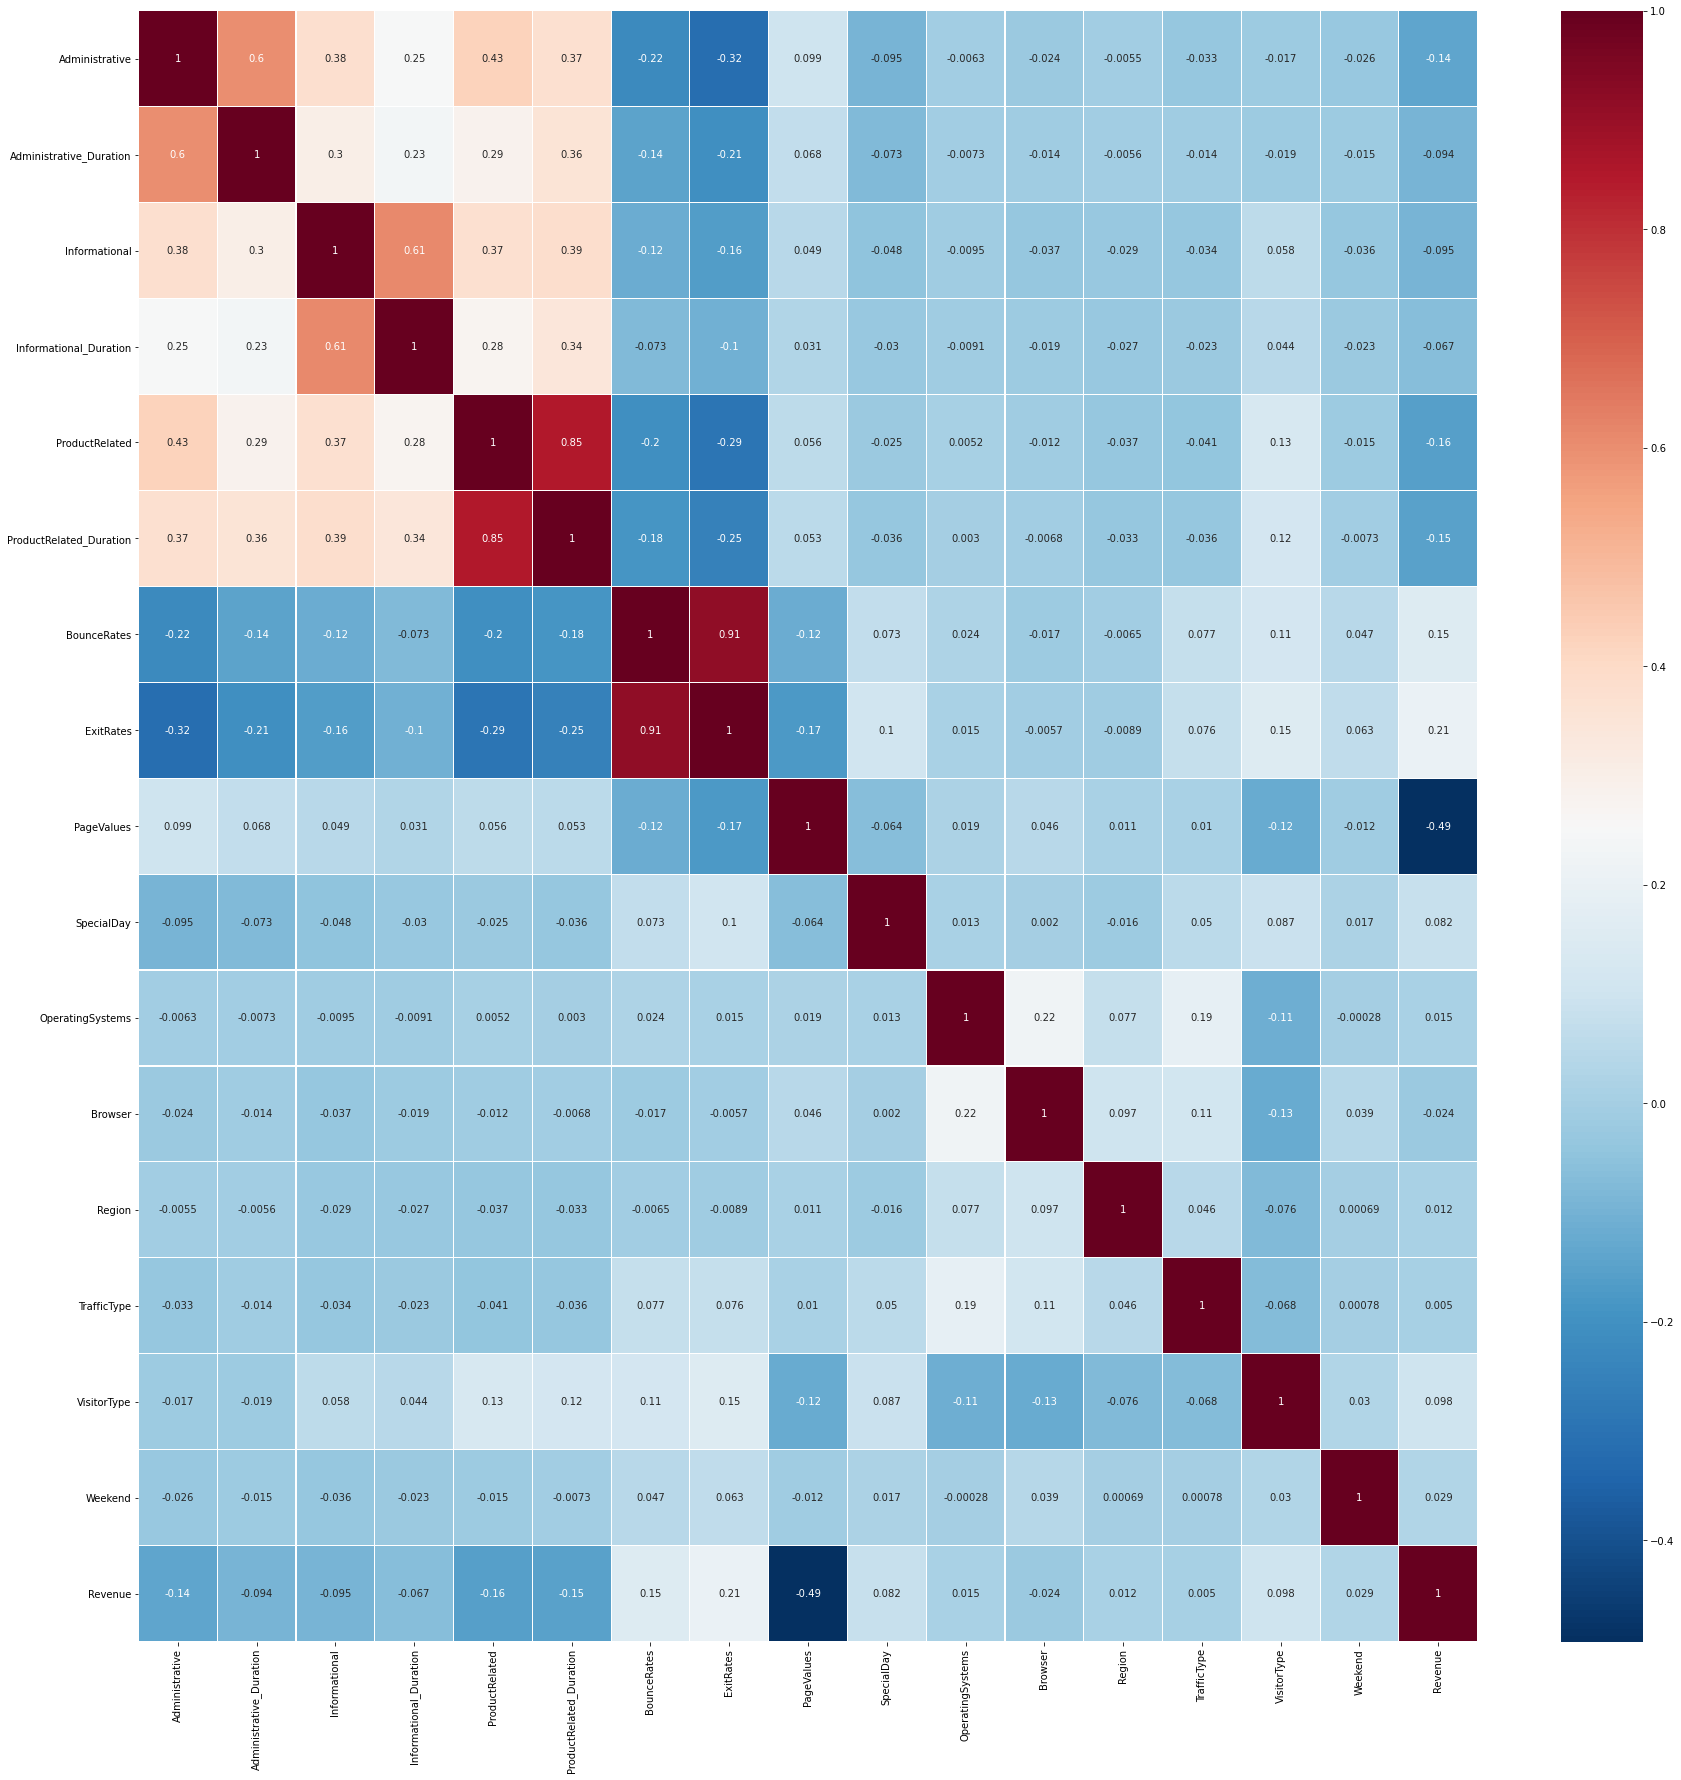

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_corr, annot=True,cmap="RdBu_r",linewidths=0.15,ax=ax)

SUBPLOT OF FEATURES

<AxesSubplot:xlabel='Revenue', ylabel='Informational_Duration'>

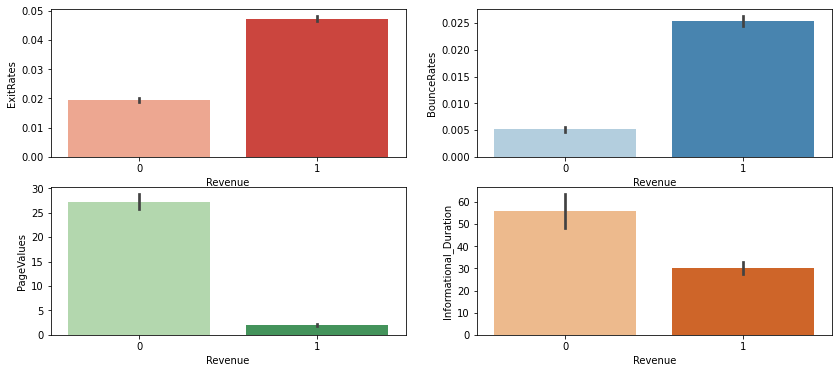

In [11]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
sns.barplot(x='Revenue',y='ExitRates',data= df,palette='Reds')
plt.subplot(2,2,2)
sns.barplot(x='Revenue',y='BounceRates',data= df,palette='Blues')
plt.subplot(2,2,3)
sns.barplot(x='Revenue',y='PageValues',data= df,palette='Greens')
plt.subplot(2,2,4)
sns.barplot(x='Revenue',y='Informational_Duration',data= df,palette='Oranges')

<b>K NEAREST NEIGHBOURS</b>

Import all the required libraries. We are using a MinMax Scaler

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Define the X and Y for the dataset

In [13]:
y = df['Revenue']
X = df.drop('Revenue', axis = 1)

Split the Train and Test Dataset

In [14]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

<b>GRID Search Using Cross Validation</b> : Find the best hyper parameter - K 

In [15]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True,scoring= 'roc_auc')

In [17]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='roc_auc')

We get the best parameter value K : 30 and Cross validation score : 0.79

In [18]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 30}
Best cross-validation score: 0.79


In [19]:
scores = grid_search.cv_results_.get('mean_test_score').tolist()

Plot of value of K and Cross validation mean test score 

Text(0, 0.5, 'Cross-Validated Accuracy-Test')

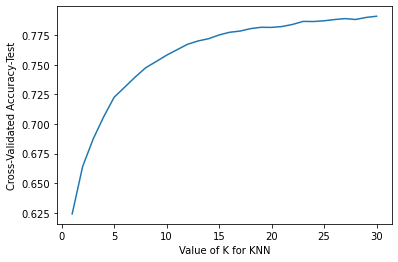

In [20]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy-Test')

Plot of Nearest neighbours and Accuracy 

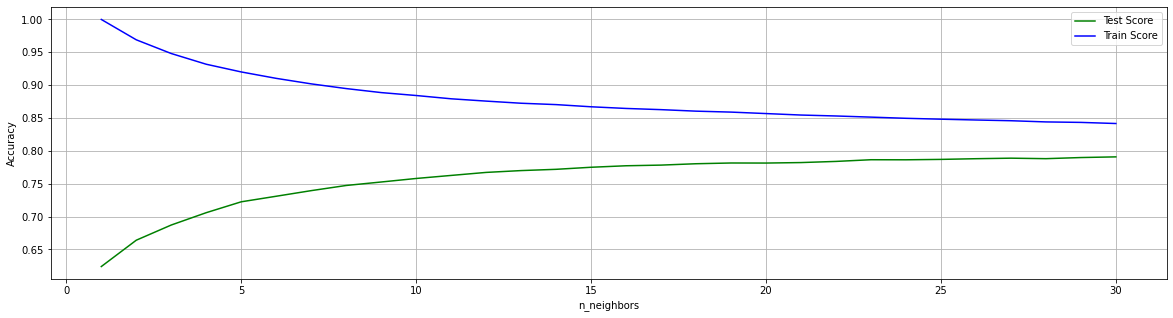

In [21]:
x_axis = k_range
%matplotlib inline

Mean_test = grid_search.cv_results_.get('mean_test_score').tolist()
Mean_train = grid_search.cv_results_.get('mean_train_score').tolist()

plt.subplots(figsize = (20,5))
plt.plot(x_axis,Mean_test , label = 'Test Score', c = 'g')
plt.plot(x_axis, Mean_train , label = 'Train Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

Examine the best model

In [22]:
print('Single best score achieved across all params (k)',grid_search.best_score_)
print( 'K values', grid_search.best_params_,)
print('Actual Model' , grid_search.best_estimator_ )

Single best score achieved across all params (k) 0.7909134342574883
K values {'n_neighbors': 30}
Actual Model KNeighborsClassifier(n_neighbors=30)


Fit the model and calculate the Train,Test score, F1 Score,Accuracy Score

In [23]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,f1_score
knn = KNeighborsClassifier(30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
f = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))
print("F1 score: {}".format(f1))
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))


Confusion Matrix :
[[  57   17]
 [ 467 2542]]
F1 score: 0.913074712643678
Train score: 0.8646
Test score: 0.8430


<b> Logistic Regression </b>

GRID SEARCH - For the best paramaters penalty and C

In [24]:
from sklearn.linear_model import LogisticRegression
c_range=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid = {"C": c_range , "penalty":["l1","l2"],"solver":["liblinear"]}
logreg = LogisticRegression(max_iter = 10000)
logreg_cv = GridSearchCV(logreg,grid,cv= 5)
logreg_cv.fit(X_train,y_train)

print("tuned Hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned Hyperparameters :(best parameters)  {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.8878556999400699


Tuned Hyper parameters : C - 1000, Penality - l1 

Accuracy - 0.887

In [25]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

Graph between accuracy and regularization paramter 

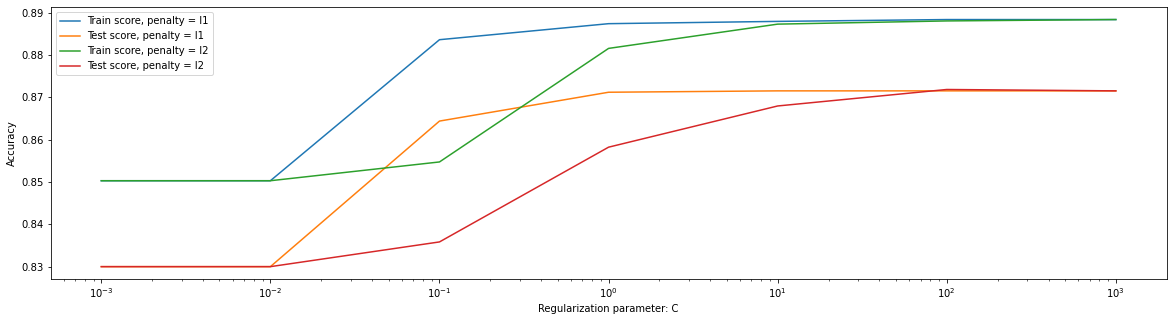

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

Text(0.5, 1.0, 'Logistic Regression with post-preocessing of results')

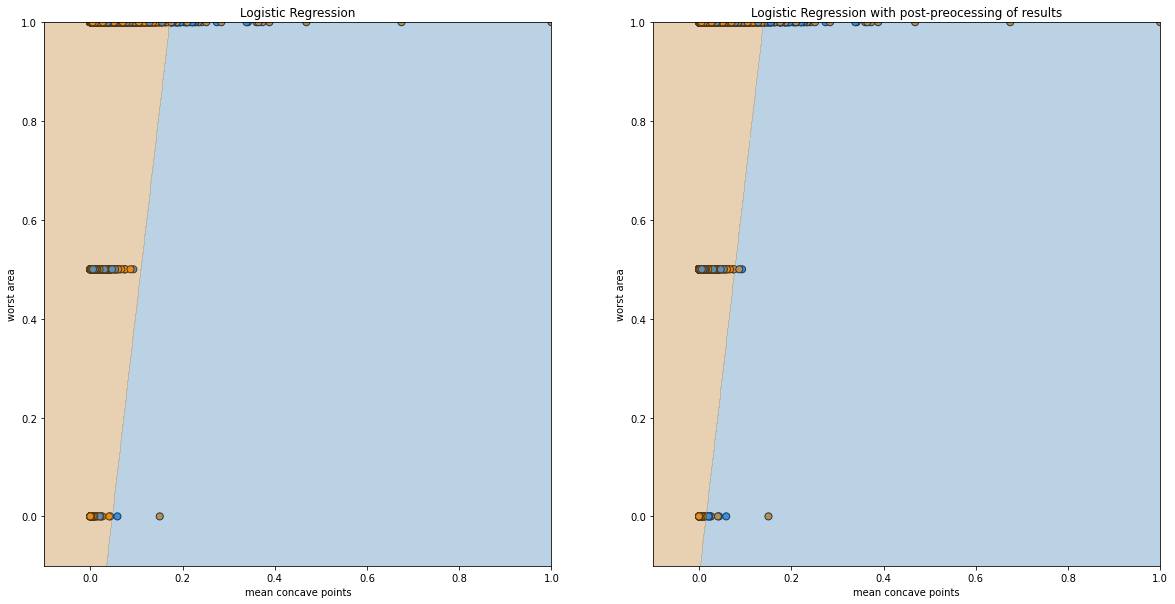

In [63]:
import matplotlib 

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["dodgerblue", "darkorange"])    

plt.subplots(figsize = (20,10))
xaxis = np.linspace(0,1, 100)

X_b = X_train[200:, [5,14]]
y_b = y_train[200:]

lreg = LogisticRegression(C = 1000, penalty = 'l1',solver = 'liblinear')
lreg.fit(X_b, y_b) 

plt.subplot(1,2,1)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')
plt.title('Logistic Regression')

plt.subplot(1,2,2)
plt.scatter(X_b[:,0], X_b[:,1], c = y_b, cmap= cmap, s = 50, edgecolor = 'k')
x1_min, x1_max = X_b[:, 0].min()-1, X_b[:, 0].max() + 1
x2_min, x2_max = X_b[:, 1].min()-1, X_b[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.001), np.arange(x2_min, x2_max, 0.001))
Z = lreg.predict_proba(np.array([xx1.ravel(), xx2.ravel()]).T)[:,1]
Z = Z.reshape(xx1.shape)
Z = np.where(Z <= 0.6, 0, 1)
plt.contourf(xx1, xx2, Z, levels = 1, alpha = 0.4, cmap=cmap)
plt.xlim(-0.1,1)
plt.ylim(-0.1,1)
plt.xlabel('mean concave points')
plt.ylabel('worst area')
plt.title('Logistic Regression with post-preocessing of results')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_cv.predict(X_test) , target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.75      0.37      0.49       524
           1       0.88      0.97      0.93      2559

    accuracy                           0.87      3083
   macro avg       0.82      0.67      0.71      3083
weighted avg       0.86      0.87      0.85      3083



In [29]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1000, solver = 'liblinear', max_iter = 500)
log_l1.fit(X_train, y_train)
train_score = (log_l1.score(X_train, y_train))
test_score = (log_l1.score(X_test, y_test))
print('Train Score',train_score)
print('Test Score' ,test_score)

y_pred = log_l1.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
f = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))
print("F1 score: {}".format(f1))
print("Accuracy score: {}".format(f))

Train Score 0.8880718070725641
Test Score 0.8715536814790789
Confusion Matrix :
[[ 193   65]
 [ 331 2494]]
F1 score: 0.9264487369985142
Accuracy score: 0.8715536814790789


<b>Linear SVC</b>

Grid Search - Naive approach 

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, LinearSVC
best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # for each combination of parameters, train an SVC
    svm = LinearSVC(C=C, max_iter = 40000)
    svm.fit(X_train, y_train)
    # evaluate the SVC on the test set
    score = svm.score(X_test, y_test)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'C': 100}


Best Hyperparameter C : 10 and Best Score : 0.87 

In [31]:
from sklearn.model_selection import cross_val_score
clf = LinearSVC()
clf.fit(X_train, y_train)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Cross Validation average score: %.2f" % cv_scores.mean())

Cross Validation average score: 0.88


In [32]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,f1_score
train_score = (clf.score(X_train, y_train))
test_score = (clf.score(X_test, y_test))
print('Train Score', train_score)
print('Test Score', test_score)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
f = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))
print("F1 score: {}".format(f1))


Train Score 0.8845030820806749
Test Score 0.8650664936749919
Confusion Matrix :
[[ 157   49]
 [ 367 2510]]
F1 score: 0.9234731420161884


<b>SVC with Kernel </b>

SVC with RBF Kernel - Grid Search 

In [33]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search_rbf = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5, return_train_score=True)

In [35]:
grid_search_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Value of C : 100 ;  Value of Gamma : 1

In [36]:
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.89


Using the best parameters find the train, test and F1 scores 

In [37]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,f1_score
clf2 = SVC(kernel='rbf', C=100,gamma = 1)
clf2.fit(X_train, y_train)
train_score = (clf2.score(X_train, y_train))
test_score = (clf2.score(X_test, y_test))
print('Train Score',train_score)
print('Test Score' ,test_score)
y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
f = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))
print("F1 score: {}".format(f1))


Train Score 0.9118633070184925
Test Score 0.8777165098929613
Confusion Matrix :
[[ 234   87]
 [ 290 2472]]
F1 score: 0.9291486562676188


SVC with the polynomial Kernel 

Grid Search to find the best hyper parameter

In [38]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree': [1,2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search_poly = GridSearchCV(SVC(kernel = 'poly'),param_grid, cv=5, return_train_score=True)

In [40]:
grid_search_poly.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [41]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 100, 'degree': 1}
Best cross-validation score: 0.89


Using the best parameters : C - 100 and Degree - 1 : Run the model and find out the train,test scores,F1 Scores

In [42]:
clf2 = SVC(kernel='poly', C=100)
clf2.fit(X_train, y_train)
train_score = (clf2.score(X_train, y_train))
test_score = (clf2.score(X_test, y_test))
print('Train Score',train_score)
print('Test Score' ,test_score)

y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
f = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))
print("F1 score: {}".format(f1))

Train Score 0.9002919865902455
Test Score 0.8757703535517353
Confusion Matrix :
[[ 215   74]
 [ 309 2485]]
F1 score: 0.9284513356996077


SVC with a Linear Kernel 

Grid Search using CV

In [43]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [44]:
grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=5, return_train_score=True)

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [46]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.89


Using the best parameters : Run the model and find out the train and test scores


In [47]:
clf3 = SVC(kernel='linear', C=100)
clf3.fit(X_train, y_train)
train_score = (clf3.score(X_train, y_train))
test_score = (clf3.score(X_test, y_test))
print('Train Score',train_score)
print('Test Score' ,test_score)
y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
f = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))
print("F1 score: {}".format(f1))

Train Score 0.8907753866118742
Test Score 0.8699318845280571
Confusion Matrix :
[[ 215   74]
 [ 309 2485]]
F1 score: 0.9284513356996077


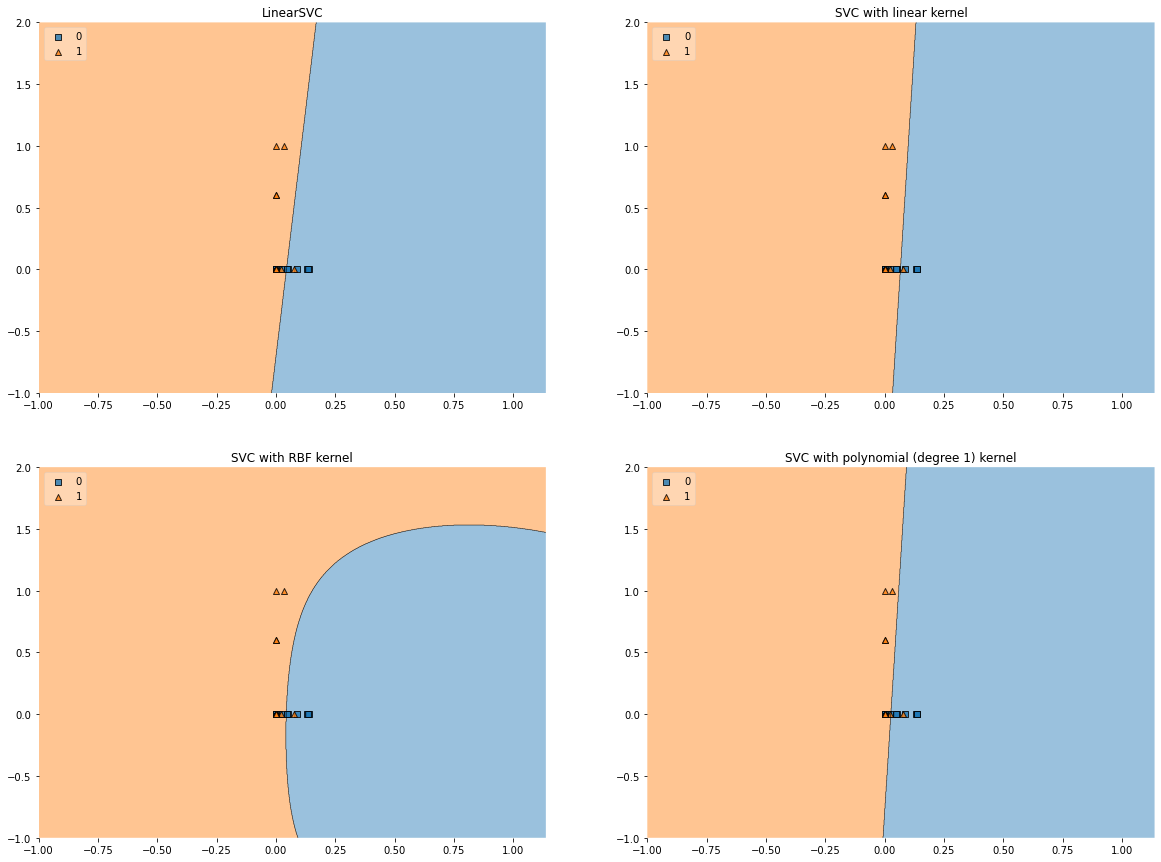

In [65]:
%matplotlib inline


from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools


X_b = X_train[:50,[8,9]]
y_b = y_train[:50]

clf1 = LinearSVC(C=C,max_iter=10000)
clf2 = SVC(kernel='linear', C= 100)
clf3 = SVC(kernel='rbf', gamma=1, C=100)
clf4 = SVC(kernel='poly', degree=1, C=100)

gs = gridspec.GridSpec(2, 2)
fig, ax = plt.subplots(figsize=(20, 15))

labels = ['LinearSVC',
'SVC with linear kernel',
'SVC with RBF kernel',
'SVC with polynomial (degree 1) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],labels,itertools.product([0, 1],repeat=2)):
    clf.fit(X_b, y_b)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_b, y=y_b.values,
    clf=clf, legend=2)
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()

Decision Tree 

Hyper Parameters : max_depth , min_samples_leaf , min_samples_split , min_impurity_decrease 

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

best_score = 0
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    for min_samples_leaf in [10,25,50,100,500,1000,250,1500,2000,750]:
        for  min_samples_split in [10,50,100,150,200,250,300,350,400,450]:
        # for each combination of parameters, train an SVC
            for min_impurity_decrease in [0.0002,0.0005,0.0007,0.0009,0.001,0.003,0.005,0.007,0.009,0.01]:
                dtree = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split, random_state=0)
                dtree.fit(X_train, y_train)
        # evaluate the SVC on the test set
                score = dtree.score(X_test, y_test)
        # if we got a better score, store the score and parameters
                if score > best_score:
                    best_score = score
                    best_parameters = {'max_depth': max_depth, 'min_samples': min_samples_leaf,'min_samples_split': min_samples_split, 'min_impurity_decrease':min_impurity_decrease}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Best score: 0.89
Best parameters: {'max_depth': 6, 'min_samples': 25, 'min_samples_split': 10, 'min_impurity_decrease': 0.0002}


In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 150, min_samples_split = 25, min_impurity_decrease =0.0002 ,random_state=0)
dtree.fit(X_train, y_train)
Test_Score = dtree.score(X_test, y_test)
Train_score = dtree.score(X_train, y_train)
print('Test_Score:', Test_Score, 'Train Score',Train_score)
y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
f = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test)
print("Confusion Matrix :\n{}".format(cm))
print("F1 score: {}".format(f1))

Test_Score: 0.8786895880635744 Train Score 0.898561695685087
Confusion Matrix :
[[ 307  157]
 [ 217 2402]]
F1 score: 0.9277713402858245


[Text(158.10000000000002, 201.90857142857143, 'X[8] <= 0.003\ngini = 0.255\nsamples = 9247\nvalue = [1384, 7863]'),
 Text(74.4, 170.84571428571428, 'X[4] <= 0.114\ngini = 0.073\nsamples = 7269\nvalue = [277, 6992]'),
 Text(37.2, 139.78285714285715, 'X[14] <= 0.75\ngini = 0.06\nsamples = 6845\nvalue = [211, 6634]'),
 Text(18.6, 108.72, 'gini = 0.132\nsamples = 1052\nvalue = [75, 977]'),
 Text(55.800000000000004, 108.72, 'gini = 0.046\nsamples = 5793\nvalue = [136, 5657]'),
 Text(111.60000000000001, 139.78285714285715, 'X[13] <= 0.079\ngini = 0.263\nsamples = 424\nvalue = [66, 358]'),
 Text(93.0, 108.72, 'gini = 0.312\nsamples = 274\nvalue = [53, 221]'),
 Text(130.20000000000002, 108.72, 'gini = 0.158\nsamples = 150\nvalue = [13, 137]'),
 Text(241.8, 170.84571428571428, 'X[6] <= 0.0\ngini = 0.493\nsamples = 1978\nvalue = [1107, 871]'),
 Text(186.0, 139.78285714285715, 'X[0] <= 0.167\ngini = 0.389\nsamples = 880\nvalue = [647, 233]'),
 Text(167.4, 108.72, 'X[8] <= 0.044\ngini = 0.284\nsam

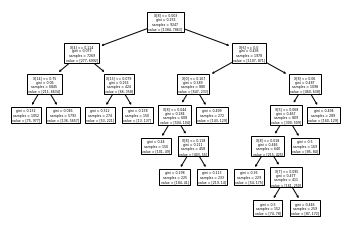

In [52]:
from sklearn import tree
tree.plot_tree(dtree)

In [53]:
import os 
import graphviz

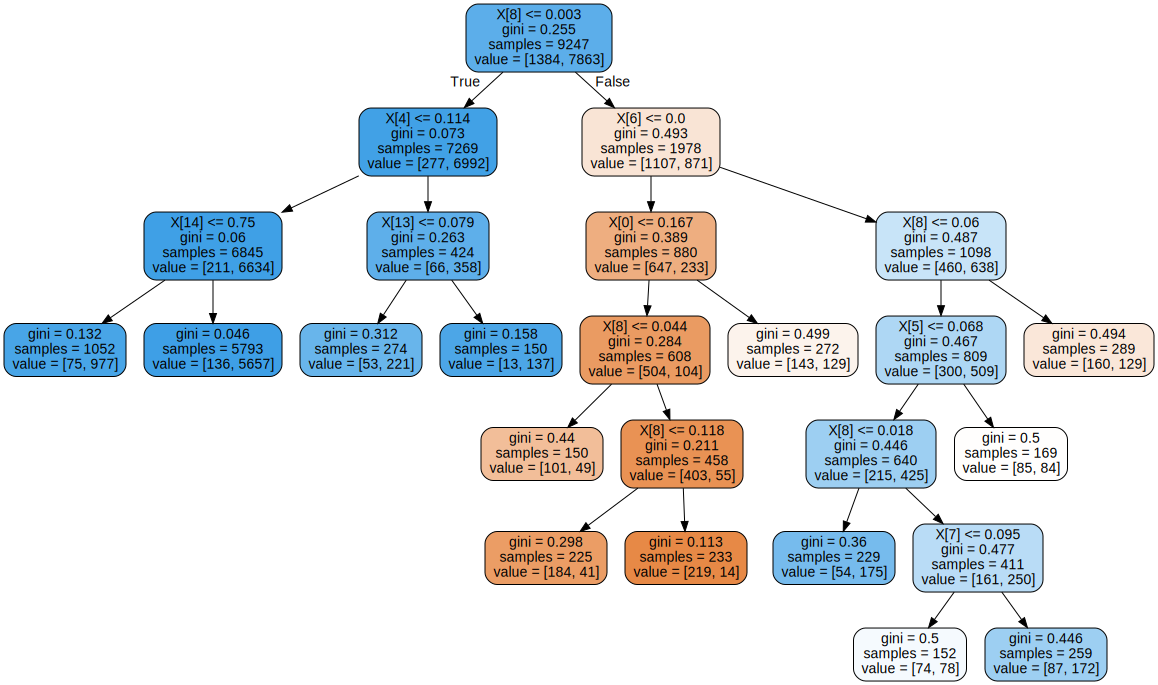

In [54]:
import os 
import graphviz
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph 

In [58]:
print('Score of the KNN Model',knn.score(X_test, y_test))
print('Score of the Logistic Regression',log_l1.score(X_test, y_test))
print('Score of the Decision Tree', dtree.score(X_test, y_test))

Score of the KNN Model 0.8430100551410963
Score of the Logistic Regression 0.8715536814790789
Score of the Decision Tree 0.8786895880635744


<b>Evaluation</b>

From all the above models we can observe : We have the highest test scores for Decision Tree classifier

BEST CLASSIFICATION MODEL : Decision Tree Classifier 

In [59]:
import numpy as np
np.set_printoptions(threshold=np.inf)
dtree = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 100, min_samples_split = 10, min_impurity_decrease =0.0002,random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
y_pred


array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

ROC_AUC Scoring function 

We have chosen ROC_AUC Scoring function. 
1. ROC_AUC is a reliable test for imbalanced datasets ( accuracy just looks at fractions of correctly assigned classes. So if all the observations belong to the majority class we simply get high accuracy scores. So we shouldnot rely on accuracy)
2. Since the classification is binary, ROC_AUC scores and confusion matrix are more robust to judge the classification


In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = dtree.predict(X_test)
print('roc_auc_score: ', roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1]))



roc_auc_score:  0.8737120744327013
